In [25]:
# phase 1 business understadning
# phase 2 data understanding
#   2.1 Univariate stats/visuals
#   2.2 Bivariate stats/visuals
# phase 3 data preparation
#   3.1 Basic Wrangling (get rid of unique identifiers, etc)
#   3.2 Missing Data
#   3.3 Bin low count catagorical values 
#   3.4 address outliers 
#   3.5 address slewness (if there are linear assumptopions)
# phase 4 model building
#   4.1 set y and X datasets first 
#   4.2 dummy code
#   4.3 normalize/ scale the X dataset 
#   4.4 split the data into train and test - to get a correct accuracy score, does not fix overfit
#   4.5 choose the best algorithm and the best features
#   4.6 train the model
# phase 5 evaluation 
#   5.1 generate fit metrics (regression: r2, r2 adjusted, mse, mae, etc) (classification: accuracy, precision, recall, f1, etc)
#   5.2 Classification: Confusion Matrix
#   5.3 Generate tree image 
#   5.4 Feature Importance 
# phase 6 deployment
#   6.1 making predictions
#   6.2 saving the model
#   6.3 deploying the model



In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

df= pd.read_csv('/Users/alexandermaat/Downloads/airline_satisfaction.csv')
pd.set_option('display.max_columns', None)
df = df.sample(n=10000, random_state=1)
label = 'satisfaction'
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
24303,dissatisfied,Male,Loyal Customer,49,Personal Travel,Eco,2501,3,4,2,3,5,2,5,5,4,4,4,3,4,5,0,0.0
59503,satisfied,Male,disloyal Customer,37,Business travel,Business,1624,4,4,4,3,2,4,2,2,4,4,4,5,4,2,12,1.0
63836,satisfied,Female,Loyal Customer,43,Business travel,Business,1755,0,0,0,2,1,2,2,1,1,1,1,5,1,1,0,0.0
2451,dissatisfied,Male,Loyal Customer,47,Personal Travel,Eco,1156,1,3,1,1,3,1,3,3,5,3,3,5,1,3,15,12.0
124012,satisfied,Male,Loyal Customer,56,Business travel,Business,3650,2,4,2,2,3,5,3,5,5,5,5,1,5,5,16,7.0


In [27]:
df.dropna(inplace=True)
df.isna().sum() / df.shape[0]


satisfaction                         0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Seat comfort                         0.0
Departure/Arrival time convenient    0.0
Food and drink                       0.0
Gate location                        0.0
Inflight wifi service                0.0
Inflight entertainment               0.0
Online support                       0.0
Ease of Online booking               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Cleanliness                          0.0
Online boarding                      0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
dtype: float64

In [28]:
# generate y and X
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
y = df[label]
X = df.drop(columns=[label])
X = pd.get_dummies(X, drop_first=True)
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
# split the data
# 70% train, 30% test - 30% hold out
# if many thousands of data, 50 50 is okay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(max_depth=12, random_state=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))
# still overfitiing, but not as bad as before

# clf = classification model 
#  all data scaled to 0 - 1 so running coef in the future will be better, not necissary if not doing coef

0.9071166054126295


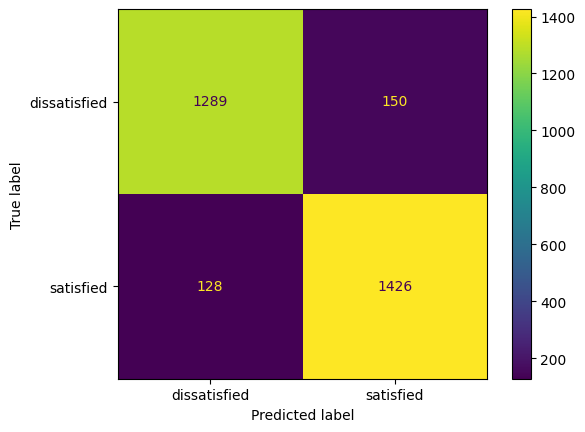

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

labels = y.sort_values().unique()
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(values_format='d')
plt.show()


In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, # This is the model we trained previously
                out_file=dot_data,
                filled=True,
                rounded=True,
                feature_names = X.columns,
                class_names=['not fraud','fraud'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('airline_satisfaction.png') # Save the image file
Image(graph.create_png())     # This is like plt.show()

In [ ]:
import sklearn.linear_model as lm
import sklearn.tree as tree



df_clf = pd.DataFrame(columns=['Accuracy'])

df_clf.loc['Base Decision Tree'] = DecisionTreeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Extra Trees'] = tree.ExtraTreeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Logistic Regression'] = lm.LogisticRegression(max_iter=1000, random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Ridge Classifier'] = lm.RidgeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)

df_clf.sort_values(by='Accuracy', ascending=False)

,Accuracy
Base Decision Tree,0.895089
Extra Trees,0.870698
Ridge Classifier,0.833612
Logistic Regression,0.832944


In [ ]:
import sklearn.linear_model as lm
import sklearn.ensemble as se
import sklearn.tree as tree
from xgboost import XGBClassifier
from sklearn import svm
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

df_clf = pd.DataFrame(columns=['Accuracy'])

df_clf.loc['Base Decision Tree'] = DecisionTreeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Extra Trees'] = tree.ExtraTreeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Logistic Regression'] = lm.LogisticRegression(max_iter=10000).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Ridge Classifier'] = lm.RidgeClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test)
# df_clf.loc['KNN'] = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).score(X_test, y_test)
# df_clf.loc['Support Vector Machine'] = svm.SVC(decision_function_shape='ovo').fit(X_train, y_train).score(X_test, y_test) # Remove the parameter for two-class model
df_clf.loc['Naive Bayes'] = CategoricalNB().fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Bagging'] = se.BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['AdaBoost'] = se.AdaBoostClassifier(n_estimators=100, random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Extra Trees ensemble'] = se.ExtraTreesClassifier(n_estimators=100, random_state=1).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Random Forest'] = se.RandomForestClassifier(n_estimators=10).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Histogram Gradient Boosting'] = se.HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Gradient Boosting'] = se.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train).score(X_test, y_test)
df_clf.loc['Neural Network'] = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train).score(X_test, y_test)

df_clf.sort_values(by=['Accuracy'], ascending=False)

IndexError: index 1 is out of bounds for axis 1 with size 1